# Exercise 1.1 Instability of Eigenvalues of non symmetric matrices

In [111]:
import numpy as np
from numpy.linalg import eigh, inv, eigvals, eigh, eig, norm
import matplotlib.pyplot as plt
from tqdm import tqdm
from fitter import Fitter

In [ ]:
def generate_O():
    H = np.random.normal(loc=0, scale=1, size=N*N).reshape((N, N))
    M = (H + H.T) / np.sqrt(2*N)
    D, P = eigh(M)
    D = np.diag(np.sign(D))
    M = P @ D @ inv(P)
    return M

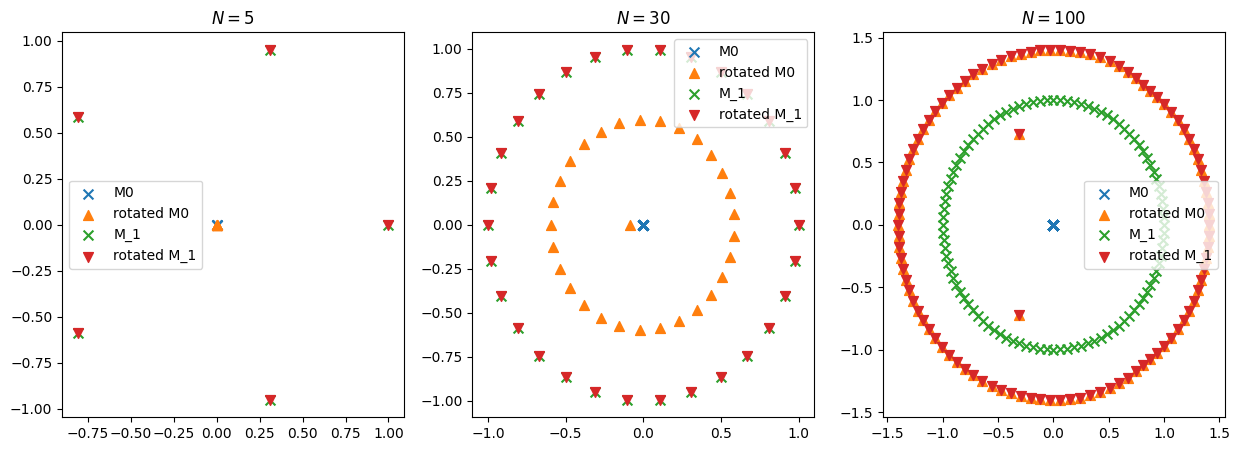

In [191]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
for i, N in enumerate((5, 30, 100)):
    O = generate_O()
    M = np.diag(np.ones(N-1), 1) * 2
    ax = axes[i]
    orig_vals, _ = eig(M)
    ax.scatter(orig_vals.real, orig_vals.imag, label="M0", marker='x', s=50)

    # Rotating the matrix M, which shouldnt change the eigenvalues
    vals, _  = eig(O @ M @ O.T)
    ax.scatter(vals.real, vals.imag, label="rotated M0", marker='^', s=50)

    M_1 = M.copy()
    M_1[N-1, 0] = (1/2)**(N-1)

    m_1_vals_orig, _  = eig(M_1)
    ax.scatter(m_1_vals_orig.real, m_1_vals_orig.imag, label="M_1", marker='x', s=50)

    m_1_vals, _  = eig(O @ M_1 @ O.T)
    ax.scatter(m_1_vals.real, m_1_vals.imag, label="rotated M_1", marker='v', s=50)
    ax.legend()
    ax.set_title(f"$N={N}$")
    #M